<a href="https://colab.research.google.com/github/siddharth101/Double_suspension/blob/main/Tension_calculation_double_block_Vermeer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:

from sympy import zeros, symbols
from sympy import eye, Matrix
import sympy.physics.mechanics as me
from sympy import expand
from sympy.parsing.sympy_parser import parse_expr
from sympy.physics.mechanics import Body, PinJoint, PrismaticJoint, JointsMethod, inertia
from sympy.physics.mechanics import dynamicsymbols
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, outer
from sympy.physics.mechanics import ReferenceFrame, Point, RigidBody
from sympy.physics.mechanics import kinetic_energy, potential_energy, Point, Particle

import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

smp.init_printing(use_latex='mathjax')

In [59]:
!ls sample_data/

anscombe.json		      double_suspension_4_wires.png  README.md
california_housing_test.csv   mnist_test.csv		     single_block_4_wires.png
california_housing_train.csv  mnist_train_small.csv


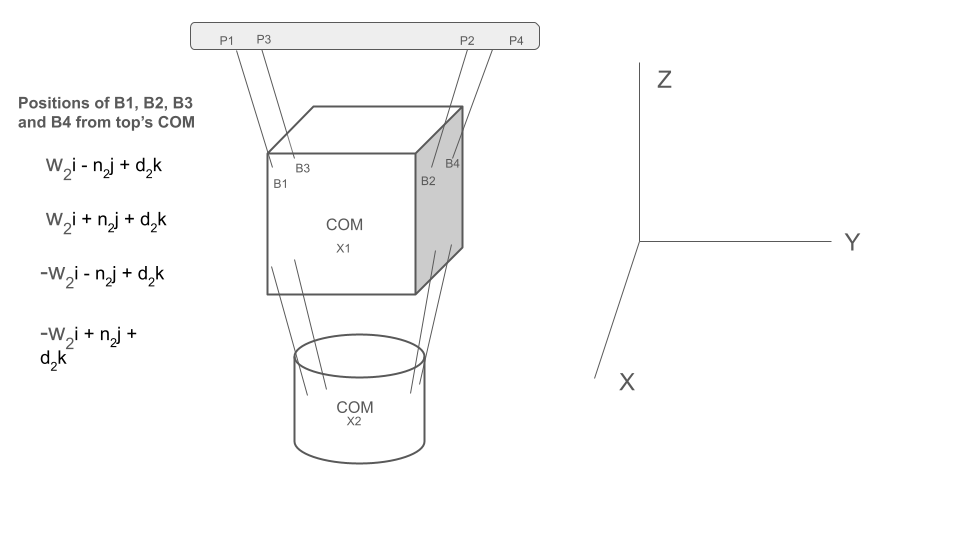

In [60]:
import cv2
from google.colab.patches import cv2_imshow
# Open the image.
img = cv2.imread("/content/sample_data/double_suspension_4_wires.png")

cv2_imshow(img)

In [61]:
q1, q2, q3, q4, q5, q6, q7, u1, u2, u3, u4, u5, u6, u7, x_n1, x_n2, x_01, x_02 = dynamicsymbols('q1 q2 q3 q4 q5 q6 q7 u1 u2 u3 u4 u5 u6 u7 x_n1 x_n2 x_01 x_02')
M1, M2, k1, k2, g, ixx1, ixx2, iyy1, iyy2, izz1, izz2, c1, c2, t = symbols('M1 M2 k1 k2 g ixx1 ixx2 iyy1 iyy2 izz1 izz2 c1 c2 t')

#Define the tensions in the first stage of wires (from Ps to Bs)
T11, T12, T13, T14 = symbols('T11 T12 T13 T14')

#Define the tensions in the second stage of wires (from Cs to Ds)
T21, T22, T23, T24 = symbols('T21 T22 T23 T24')

gamma, alpha1, alpha2, beta1, beta2, omega1, omega2 = dynamicsymbols('gamma, alpha1, alpha2, beta1, beta2, omega1, omega2')
#Define geometrical properties (see images)
d1, d2, n1, n2, w1, w2 = symbols('d1 d2 n1 n2 w1 w2', real=True, positive=True)
d3, n3, w3 = symbols('d3 n3 w3', real=True, positive=True)
d4, n4, w4 = symbols('d4 n4 w4', real=True, positive=True)


In [62]:
N = ReferenceFrame('N') # this is the global frame
N_a = ReferenceFrame('N_a') # this is the  frame of suspension point
A = ReferenceFrame('A') # this is the frame of the first body
B = ReferenceFrame('B') # this is the frame of the second body

A.orient_axis(N, 0, N.z) # Initially A and N are parallel
B.orient_axis(N, 0, N.z) # Initially B and N are parallel
N_a.orient_axis(N, 0, N.z) # Initially N and N_a are parallel

In [63]:
#Origin of the reference frqme
O = Point('O')

#Attachment points (on the reference frame)
P = Point('P')
P1 = Point('P1')
P2 = Point('P2')
P3 = Point('P3')
P4 = Point('P4')

#Mass 1
#Center of Mass 1
X1 = Point('X1')
#Upper attachment points
B1 = Point('B1')
B2 = Point('B2')
B3 = Point('B3')
B4 = Point('B4')
#Lower attachment points
C1 = Point('C1')
C2 = Point('C2')
C3 = Point('C3')
C4 = Point('C4')

#Mass 2
#Center of Mass 2
X2 = Point('X2')
#Upper attachment points
D1 = Point('D1')
D2 = Point('D2')
D3 = Point('D3')
D4 = Point('D4')


In [64]:
P.set_pos(O, q2*N.y)

X1.set_pos(O,  q1*N.x + q2*N.y -q3*N.z)

#X2.set_pos(O,  q5*N.x + q6*N.y -q7*N.z)

X2.set_pos(O,  q1*N.x + q2*N.y -q6*N.z)

#Set coordinates of the Ps
P1.set_pos(P, w1*N_a.x - n1*N_a.y + d1*N_a.z)
P2.set_pos(P, w1*N_a.x + n1*N_a.y + d1*N_a.z)
P3.set_pos(P, -w1*N_a.x - n1*N_a.y + d1*N_a.z)
P4.set_pos(P, -w1*N_a.x + n1*N_a.y + d1*N_a.z)

In [65]:
#Set coordinates of the Bs
B1.set_pos(X1, w2*A.x +  d2*A.z - n2*A.y)
B2.set_pos(X1, w2*A.x +  d2*A.z + n2*A.y)
B3.set_pos(X1, -w2*A.x + d2*A.z - n2*A.y)
B4.set_pos(X1, -w2*A.x + d2*A.z + n2*A.y)

#Set coordinates of the Cs
# C1.set_pos(X1, w3*A.x +  d3*A.z - n3*A.y)
# C2.set_pos(X1, w3*A.x +  d3*A.z + n3*A.y)
# C3.set_pos(X1, -w3*A.x + d3*A.z - n3*A.y)
# C4.set_pos(X1, -w3*A.x + d3*A.z + n3*A.y)

C1.set_pos(X1, w3*A.x -  d3*A.z - n3*A.y)
C2.set_pos(X1, w3*A.x -  d3*A.z + n3*A.y)
C3.set_pos(X1, -w3*A.x - d3*A.z - n3*A.y)
C4.set_pos(X1, -w3*A.x - d3*A.z + n3*A.y)



#Set coordinates of the Ds
D1.set_pos(X2, w4*B.x +  d4*B.z - n4*B.y)
D2.set_pos(X2, w4*B.x +  d4*B.z + n4*B.y)
D3.set_pos(X2, -w4*B.x + d4*B.z - n4*B.y)
D4.set_pos(X2, -w4*B.x + d4*B.z + n4*B.y)

In [66]:
def pos(point1, point2, frame=N, normalize=False):

  pos = point1.pos_from(point2).express(frame)

  if normalize:
    pos = pos.normalize()
  else:
    pass
  return pos

In [67]:
pos(P1, B1, N, normalize=True)

                     w₁ - w₂ - q₁(t)
────────────────────────────────────────────────────────── n_x + ─────────────
   _______________________________________________________          __________
  ╱           2                    2                    2          ╱
╲╱  (-n₁ + n₂)  + (d₁ - d₂ + q₃(t))  + (w₁ - w₂ - q₁(t))         ╲╱  (-n₁ + n₂

            -n₁ + n₂                                                     d₁ -
───────────────────────────────────────────── n_y + ──────────────────────────
_____________________________________________          _______________________
 2                    2                    2          ╱           2
)  + (d₁ - d₂ + q₃(t))  + (w₁ - w₂ - q₁(t))         ╲╱  (-n₁ + n₂)  + (d₁ - d₂

d₂ + q₃(t)
──────────────────────────────── n_z
________________________________
         2                    2
 + q₃(t))  + (w₁ - w₂ - q₁(t))

In [68]:
pos(P2, B2, N)

(w₁ - w₂ - q₁(t)) n_x + (n₁ - n₂) n_y + (d₁ - d₂ + q₃(t)) n_z

In [69]:
pos(C1, D1, N)

(w₃ - w₄) n_x + (-n₃ + n₄) n_y + (-d₃ - d₄ - q₃(t) + q₆(t)) n_z

In [70]:
#length first tsage of wires
l11, l12, l13, l14, l1 = symbols('l11 l12 l13 l14, l', real=True, positive=True)

#length second stage of wires
l21, l22, l23, l24, l2 = symbols('l21 l22 l23 l24, l', real=True, positive=True)

In [71]:

# Tension of the wires on Mass 1
dirT11, dirT12, dirT13, dirT14 = pos(P1, B1, N, normalize=True), pos(P2, B2, N, normalize=True), pos(P3, B3, N, normalize=True), pos(P4, B4, N, normalize=True)

# Tension of the wires on the Mass 2
dirT21, dirT22, dirT23, dirT24 = pos(C1, D1, N, normalize=True), pos(C2, D2, N, normalize=True), pos(C3, D3, N, normalize=True), pos(C4, D4, N, normalize=True)

In [72]:
dirT11

                     w₁ - w₂ - q₁(t)
────────────────────────────────────────────────────────── n_x + ─────────────
   _______________________________________________________          __________
  ╱           2                    2                    2          ╱
╲╱  (-n₁ + n₂)  + (d₁ - d₂ + q₃(t))  + (w₁ - w₂ - q₁(t))         ╲╱  (-n₁ + n₂

            -n₁ + n₂                                                     d₁ -
───────────────────────────────────────────── n_y + ──────────────────────────
_____________________________________________          _______________________
 2                    2                    2          ╱           2
)  + (d₁ - d₂ + q₃(t))  + (w₁ - w₂ - q₁(t))         ╲╱  (-n₁ + n₂)  + (d₁ - d₂

d₂ + q₃(t)
──────────────────────────────── n_z
________________________________
         2                    2
 + q₃(t))  + (w₁ - w₂ - q₁(t))

In [73]:
net_torque1 = pos(B1, X1, N).cross(dirT11)*T11 + pos(B2, X1, N).cross(dirT12)*T12 + pos(B3, X1, N).cross(dirT13)*T13 + pos(B4, X1, N).cross(dirT14)*T14 - pos(C1, X1, N).cross(dirT21)*T21 - pos(C2, X1, N).cross(dirT22)*T22 - pos(C3, X1, N).cross(dirT23)*T23 - pos(C4, X1, N).cross(dirT24)*T24

In [74]:
#length of the first stage of wires
l11_len, l12_len, l13_len, l14_len = pos(P1, B1, N).magnitude(), pos(P2, B2, N).magnitude(), pos(P3, B3, N).magnitude(), pos(P4, B4, N).magnitude()

#length of the second stage of wires
l21_len, l22_len, l23_len, l24_len = pos(C1, D1, N).magnitude(), pos(C2, D2, N).magnitude(), pos(C3, D3, N).magnitude(), pos(C4, D4, N).magnitude()

In [75]:
l21_len

   ________________________________________________________
  ╱           2            2                             2 
╲╱  (-n₃ + n₄)  + (w₃ - w₄)  + (-d₃ - d₄ - q₃(t) + q₆(t))  

In [76]:
l12_len

   ______________________________________________________
  ╱          2                    2                    2 
╲╱  (n₁ - n₂)  + (d₁ - d₂ + q₃(t))  + (w₁ - w₂ - q₁(t))  

In [77]:
#Torque equilibrium on the first mass
net_torque1_ = net_torque1.subs({l11_len:l11, l12_len:l12, l13_len:l13, l14_len:l14, l21_len:l21, l22_len:l22, l23_len:l23, l24_len:l24})

In [78]:
net_torque1_

⎛    ⎛  d₂⋅(-n₁ + n₂)   n₂⋅(d₁ - d₂ + q₃(t))⎞       ⎛  d₂⋅(n₁ - n₂)   n₂⋅(d₁ -
⎜T₁₁⋅⎜- ───────────── - ────────────────────⎟ + T₁₂⋅⎜- ──────────── + ────────
⎝    ⎝       l₁₁                l₁₁         ⎠       ⎝      l₁₂

 d₂ + q₃(t))⎞       ⎛  d₂⋅(-n₁ + n₂)   n₂⋅(d₁ - d₂ + q₃(t))⎞       ⎛  d₂⋅(n₁ -
────────────⎟ + T₁₃⋅⎜- ───────────── - ────────────────────⎟ + T₁₄⋅⎜- ────────
l₁₂         ⎠       ⎝       l₁₃                l₁₃         ⎠       ⎝      l₁₄

 n₂)   n₂⋅(d₁ - d₂ + q₃(t))⎞       ⎛d₃⋅(-n₃ + n₄)   n₃⋅(-d₃ - d₄ - q₃(t) + q₆(
──── + ────────────────────⎟ - T₂₁⋅⎜───────────── - ──────────────────────────
               l₁₄         ⎠       ⎝     l₂₁                     l₂₁

t))⎞       ⎛d₃⋅(n₃ - n₄)   n₃⋅(-d₃ - d₄ - q₃(t) + q₆(t))⎞       ⎛d₃⋅(-n₃ + n₄)
───⎟ - T₂₂⋅⎜──────────── + ─────────────────────────────⎟ - T₂₃⋅⎜─────────────
   ⎠       ⎝    l₂₂                     l₂₂             ⎠       ⎝     l₂₃

   n₃⋅(-d₃ - d₄ - q₃(t) + q₆(t))⎞       ⎛d₃⋅(n₃ - n₄)   n₃⋅(-d₃ - d₄ - q₃(t) +
 

In [79]:
#net_torque.subs({T1:T, T2:T, T3:T, T4:T}).simplify()

In [80]:
net_torque1_.dot(N.x)

    ⎛  d₂⋅(-n₁ + n₂)   n₂⋅(d₁ - d₂ + q₃(t))⎞       ⎛  d₂⋅(n₁ - n₂)   n₂⋅(d₁ - 
T₁₁⋅⎜- ───────────── - ────────────────────⎟ + T₁₂⋅⎜- ──────────── + ─────────
    ⎝       l₁₁                l₁₁         ⎠       ⎝      l₁₂                l

d₂ + q₃(t))⎞       ⎛  d₂⋅(-n₁ + n₂)   n₂⋅(d₁ - d₂ + q₃(t))⎞       ⎛  d₂⋅(n₁ - 
───────────⎟ + T₁₃⋅⎜- ───────────── - ────────────────────⎟ + T₁₄⋅⎜- ─────────
₁₂         ⎠       ⎝       l₁₃                l₁₃         ⎠       ⎝      l₁₄  

n₂)   n₂⋅(d₁ - d₂ + q₃(t))⎞       ⎛d₃⋅(-n₃ + n₄)   n₃⋅(-d₃ - d₄ - q₃(t) + q₆(t
─── + ────────────────────⎟ - T₂₁⋅⎜───────────── - ───────────────────────────
              l₁₄         ⎠       ⎝     l₂₁                     l₂₁           

))⎞       ⎛d₃⋅(n₃ - n₄)   n₃⋅(-d₃ - d₄ - q₃(t) + q₆(t))⎞       ⎛d₃⋅(-n₃ + n₄) 
──⎟ - T₂₂⋅⎜──────────── + ─────────────────────────────⎟ - T₂₃⋅⎜───────────── 
  ⎠       ⎝    l₂₂                     l₂₂             ⎠       ⎝     l₂₃      

  n₃⋅(-d₃ - d₄ - q₃(t) + q₆(t))⎞       ⎛d₃⋅(n₃ -

In [81]:
(net_torque1_.dot(N.y))

    ⎛d₂⋅(w₁ - w₂ - q₁(t))   w₂⋅(d₁ - d₂ + q₃(t))⎞       ⎛d₂⋅(w₁ - w₂ - q₁(t)) 
T₁₁⋅⎜──────────────────── - ────────────────────⎟ + T₁₂⋅⎜──────────────────── 
    ⎝        l₁₁                    l₁₁         ⎠       ⎝        l₁₂          

  w₂⋅(d₁ - d₂ + q₃(t))⎞       ⎛d₂⋅(-w₁ + w₂ - q₁(t))   w₂⋅(d₁ - d₂ + q₃(t))⎞  
- ────────────────────⎟ + T₁₃⋅⎜───────────────────── + ────────────────────⎟ +
          l₁₂         ⎠       ⎝         l₁₃                    l₁₃         ⎠  

     ⎛d₂⋅(-w₁ + w₂ - q₁(t))   w₂⋅(d₁ - d₂ + q₃(t))⎞       ⎛  d₃⋅(w₃ - w₄)   w₃
 T₁₄⋅⎜───────────────────── + ────────────────────⎟ - T₂₁⋅⎜- ──────────── - ──
     ⎝         l₁₄                    l₁₄         ⎠       ⎝      l₂₁          

⋅(-d₃ - d₄ - q₃(t) + q₆(t))⎞       ⎛  d₃⋅(w₃ - w₄)   w₃⋅(-d₃ - d₄ - q₃(t) + q₆
───────────────────────────⎟ - T₂₂⋅⎜- ──────────── - ─────────────────────────
           l₂₁             ⎠       ⎝      l₂₂                     l₂₂         

(t))⎞       ⎛  d₃⋅(-w₃ + w₄)   w₃⋅(-d₃ - d₄ - q₃

In [82]:
(net_torque1_.dot(N.z))

    ⎛n₂⋅(w₁ - w₂ - q₁(t))   w₂⋅(-n₁ + n₂)⎞       ⎛  n₂⋅(w₁ - w₂ - q₁(t))   w₂⋅
T₁₁⋅⎜──────────────────── + ─────────────⎟ + T₁₂⋅⎜- ──────────────────── + ───
    ⎝        l₁₁                 l₁₁     ⎠       ⎝          l₁₂               

(n₁ - n₂)⎞       ⎛n₂⋅(-w₁ + w₂ - q₁(t))   w₂⋅(-n₁ + n₂)⎞       ⎛  n₂⋅(-w₁ + w₂
─────────⎟ + T₁₃⋅⎜───────────────────── - ─────────────⎟ + T₁₄⋅⎜- ────────────
 l₁₂     ⎠       ⎝         l₁₃                 l₁₃     ⎠       ⎝           l₁₄

 - q₁(t))   w₂⋅(n₁ - n₂)⎞       ⎛n₃⋅(w₃ - w₄)   w₃⋅(-n₃ + n₄)⎞       ⎛  n₃⋅(w₃
───────── - ────────────⎟ - T₂₁⋅⎜──────────── + ─────────────⎟ - T₂₂⋅⎜- ──────
                l₁₄     ⎠       ⎝    l₂₁             l₂₁     ⎠       ⎝      l₂

 - w₄)   w₃⋅(n₃ - n₄)⎞       ⎛n₃⋅(-w₃ + w₄)   w₃⋅(-n₃ + n₄)⎞       ⎛  n₃⋅(-w₃ 
────── + ────────────⎟ - T₂₃⋅⎜───────────── - ─────────────⎟ - T₂₄⋅⎜- ────────
₂            l₂₂     ⎠       ⎝     l₂₃             l₂₃     ⎠       ⎝       l₂₄

+ w₄)   w₃⋅(n₃ - n₄)⎞
───── - ────────────⎟
    

In [83]:
T11*dirT11

                  T₁₁⋅(w₁ - w₂ - q₁(t))
────────────────────────────────────────────────────────── n_x + ─────────────
   _______________________________________________________          __________
  ╱           2                    2                    2          ╱
╲╱  (-n₁ + n₂)  + (d₁ - d₂ + q₃(t))  + (w₁ - w₂ - q₁(t))         ╲╱  (-n₁ + n₂

         T₁₁⋅(-n₁ + n₂)                                               T₁₁⋅(d₁
───────────────────────────────────────────── n_y + ──────────────────────────
_____________________________________________          _______________________
 2                    2                    2          ╱           2
)  + (d₁ - d₂ + q₃(t))  + (w₁ - w₂ - q₁(t))         ╲╱  (-n₁ + n₂)  + (d₁ - d₂

- d₂ + q₃(t))
──────────────────────────────── n_z
________________________________
         2                    2
 + q₃(t))  + (w₁ - w₂ - q₁(t))

In [84]:
T11*(dirT11.dot(N.z))

                  T₁₁⋅(d₁ - d₂ + q₃(t))                   
──────────────────────────────────────────────────────────
   _______________________________________________________
  ╱           2                    2                    2 
╲╱  (-n₁ + n₂)  + (d₁ - d₂ + q₃(t))  + (w₁ - w₂ - q₁(t))  

In [85]:
#Tensions on the vertical axis

T11z, T12z, T13z, T14z = T11*(dirT11.dot(N.z)).subs({l11_len:l11}), T12*(dirT12.dot(N.z)).subs({ l12_len:l12}), T13*(dirT13.dot(N.z)).subs({l13_len:l13}), T14*(dirT14.dot(N.z)).subs({l14_len:l14})
T21z, T22z, T23z, T24z = T21*(dirT21.dot(N.z)).subs({l21_len:l21}), T22*(dirT22.dot(N.z)).subs({ l22_len:l22}), T23*(dirT23.dot(N.z)).subs({l23_len:l23}), T24*(dirT24.dot(N.z)).subs({l24_len:l24})

In [86]:
T11z

T₁₁⋅(d₁ - d₂ + q₃(t))
─────────────────────
         l₁₁         

In [87]:
T23z

T₂₃⋅(-d₃ - d₄ - q₃(t) + q₆(t))
──────────────────────────────
             l₂₃              

In [88]:
#Torque equilibrium on the second mass
net_torque2 = pos(D1, X2, N).cross(dirT21)*T21 + pos(D2, X2, N).cross(dirT22)*T22 + pos(D3, X2, N).cross(dirT23)*T23 + pos(D4, X2, N).cross(dirT24)*T24

In [89]:
net_torque2_ = net_torque2.subs({l21_len:l21, l22_len:l22, l23_len:l23, l24_len:l24})
#net_torque2_=net_torque2_.simplify()

In [90]:
from sympy import solve

In [91]:
#Solving the equilibrium on the bottom mass

sol_tensions = solve([net_torque2_.dot(N.x), (net_torque2_.dot(N.y)), (net_torque2_.dot(N.z)), T21z + T22z + T23z + T24z - M2*g ], (T21, T22, T23, T24),
      dict=True)

In [92]:
T21 = sol_tensions[0][T21]
T22 = sol_tensions[0][T22]
T23 = sol_tensions[0][T23]
T24 = sol_tensions[0][T24]



In [93]:
T21 = T21.simplify()
T22 = T22.simplify()
T23 = T23.simplify()
T24 = T24.simplify()


In [94]:
T21

           -M₂⋅g⋅l₂₁           
───────────────────────────────
4⋅d₃ + 4⋅d₄ + 4⋅q₃(t) - 4⋅q₆(t)

In [95]:
net_torque1 = pos(B1, X1, N).cross(dirT11)*T11 + pos(B2, X1, N).cross(dirT12)*T12 + pos(B3, X1, N).cross(dirT13)*T13 + pos(B4, X1, N).cross(dirT14)*T14 - pos(C1, X1, N).cross(dirT21)*T21 - pos(C2, X1, N).cross(dirT22)*T22 - pos(C3, X1, N).cross(dirT23)*T23 - pos(C4, X1, N).cross(dirT24)*T24

In [96]:
net_torque1_ = net_torque1.subs({l11_len:l11, l12_len:l12, l13_len:l13, l14_len:l14, l21_len:l21, l22_len:l22, l23_len:l23, l24_len:l24})

In [97]:
net_torque1_=net_torque1_.simplify()


In [98]:
net_torque1_

(d₂⋅(n₁ - n₂) - n₂⋅(d₁ - d₂ + q₃(t)))⋅(T₁₁⋅l₁₂⋅l₁₃⋅l₁₄ - T₁₂⋅l₁₁⋅l₁₃⋅l₁₄ + T₁₃
──────────────────────────────────────────────────────────────────────────────
                                               l₁₁⋅l₁₂⋅l₁₃⋅l₁₄

⋅l₁₁⋅l₁₂⋅l₁₄ - T₁₄⋅l₁₁⋅l₁₂⋅l₁₃)       -T₁₁⋅l₁₂⋅l₁₃⋅l₁₄⋅(d₂⋅(-w₁ + w₂ + q₁(t))
─────────────────────────────── n_x + ────────────────────────────────────────


+ w₂⋅(d₁ - d₂ + q₃(t))) - T₁₂⋅l₁₁⋅l₁₃⋅l₁₄⋅(d₂⋅(-w₁ + w₂ + q₁(t)) + w₂⋅(d₁ - d₂
──────────────────────────────────────────────────────────────────────────────


 + q₃(t))) - T₁₃⋅l₁₁⋅l₁₂⋅l₁₄⋅(d₂⋅(w₁ - w₂ + q₁(t)) - w₂⋅(d₁ - d₂ + q₃(t))) - T
──────────────────────────────────────────────────────────────────────────────
  l₁₁⋅l₁₂⋅l₁₃⋅l₁₄

₁₄⋅l₁₁⋅l₁₂⋅l₁₃⋅(d₂⋅(w₁ - w₂ + q₁(t)) - w₂⋅(d₁ - d₂ + q₃(t)))       -T₁₁⋅l₁₂⋅l₁
──────────────────────────────────────────────────────────── n_y + ───────────


₃⋅l₁₄⋅(n₂⋅(-w₁ + w₂ + q₁(t)) + w₂⋅(n₁ - n₂)) + T₁₂⋅l₁₁⋅l₁₃⋅l₁₄⋅(n₂⋅(-w₁ + w₂ +
───────────────────────────────────────────

In [99]:
T21z, T22z, T23z, T24z = T21*(dirT21.dot(N.z)).subs({l21_len:l21}), T22*(dirT22.dot(N.z)).subs({ l22_len:l22}), T23*(dirT23.dot(N.z)).subs({l23_len:l23}), T24*(dirT24.dot(N.z)).subs({l24_len:l24})

### Checking for vertical

In [100]:
(T23z + T21z + T22z + T24z).simplify()

M₂⋅g

In [101]:
#Solving the equilibrium on the first mass

sol_tensions2 = solve([net_torque1_.dot(N.x), (net_torque1_.dot(N.y)), (net_torque1_.dot(N.z)), T11z + T12z + T13z + T14z - T21z - T22z - T23z - T24z - M1*g ], (T11, T12, T13, T14),
      dict=True)

In [102]:
sol_tensions2[0][T11]

                                                  M₁⋅d₁⋅g⋅l₁₁⋅w₂              
- ────────────────────────────────────────────────────────────────────────────
        2                                                    2                
  - 4⋅d₁ ⋅w₂ + 4⋅d₁⋅d₂⋅w₁ + 4⋅d₁⋅d₂⋅w₂ - 8⋅d₁⋅w₂⋅q₃(t) - 4⋅d₂ ⋅w₁ + 4⋅d₂⋅w₁⋅q₃

                                                                              
───────────────────────────────── + ──────────────────────────────────────────
                             2            2                                   
(t) + 4⋅d₂⋅w₂⋅q₃(t) - 4⋅w₂⋅q₃ (t)   - 4⋅d₁ ⋅w₂ + 4⋅d₁⋅d₂⋅w₁ + 4⋅d₁⋅d₂⋅w₂ - 8⋅d

      M₁⋅d₂⋅g⋅l₁₁⋅w₁                                                          
─────────────────────────────────────────────────────────────────── + ────────
                 2                                             2            2 
₁⋅w₂⋅q₃(t) - 4⋅d₂ ⋅w₁ + 4⋅d₂⋅w₁⋅q₃(t) + 4⋅d₂⋅w₂⋅q₃(t) - 4⋅w₂⋅q₃ (t)   - 4⋅d₁ ⋅

                                      M₁⋅d₂⋅g⋅l₁₁

In [103]:
T11 = sol_tensions2[0][T11]
T12 = sol_tensions2[0][T12]
T13 = sol_tensions2[0][T13]
T14 = sol_tensions2[0][T14]



In [104]:
T11z, T12z, T13z, T14z = T11*(dirT11.dot(N.z)).subs({l11_len:l11}), T12*(dirT12.dot(N.z)).subs({ l12_len:l12}), T13*(dirT13.dot(N.z)).subs({l13_len:l13}), T14*(dirT14.dot(N.z)).subs({l14_len:l14})

### Checking for vertical

In [105]:
(T11z + T12z + T13z + T14z).simplify()

g⋅(M₁ + M₂)

In [ ]:
T11=sol_tensions2[0][T11]
T11.simplify

KeyError: T11

In [ ]:
sol_tensions = solve([net_torque1_.dot(N.x), (net_torque1_.dot(N.y)), (net_torque1_.dot(N.z)), T11z + T12z + T13z + T14z - T21z - T22z - T23z - T24z - M1*g, net_torque2_.dot(N.x), (net_torque2_.dot(N.y)), (net_torque2_.dot(N.z)), T21z + T22z + T23z + T24z - M2*g ], (T11, T12, T13, T14, T21, T22, T23, T24),
      dict=True)


KeyboardInterrupt: 

In [ ]:
sol_tensions[0][T1]

                                                  M₁⋅d₁⋅g⋅l₁⋅w₂               
- ────────────────────────────────────────────────────────────────────────────
        2                                                    2                
  - 4⋅d₁ ⋅w₂ + 4⋅d₁⋅d₂⋅w₁ + 4⋅d₁⋅d₂⋅w₂ - 8⋅d₁⋅w₂⋅q₄(t) - 4⋅d₂ ⋅w₁ + 4⋅d₂⋅w₁⋅q₄

                                                                              
───────────────────────────────── + ──────────────────────────────────────────
                             2            2                                   
(t) + 4⋅d₂⋅w₂⋅q₄(t) - 4⋅w₂⋅q₄ (t)   - 4⋅d₁ ⋅w₂ + 4⋅d₁⋅d₂⋅w₁ + 4⋅d₁⋅d₂⋅w₂ - 8⋅d

      M₁⋅d₂⋅g⋅l₁⋅w₁                                                           
─────────────────────────────────────────────────────────────────── + ────────
                 2                                             2            2 
₁⋅w₂⋅q₄(t) - 4⋅d₂ ⋅w₁ + 4⋅d₂⋅w₁⋅q₄(t) + 4⋅d₂⋅w₂⋅q₄(t) - 4⋅w₂⋅q₄ (t)   - 4⋅d₁ ⋅

                                       M₁⋅d₂⋅g⋅l₁

In [ ]:
l3_len, l2_len, l1_len, l4_len

⎛   ________________________________________________________     _____________
⎜  ╱           2                    2                     2     ╱          2  
⎝╲╱  (-n₁ + n₂)  + (d₁ - d₂ + q₄(t))  + (-w₁ + w₂ - q₁(t))  , ╲╱  (n₁ - n₂)  +

_________________________________________     ________________________________
                  2                    2     ╱           2                    
 (d₁ - d₂ + q₄(t))  + (w₁ - w₂ - q₁(t))  , ╲╱  (-n₁ + n₂)  + (d₁ - d₂ + q₄(t))

_______________________     __________________________________________________
2                    2     ╱          2                    2                  
  + (w₁ - w₂ - q₁(t))  , ╲╱  (n₁ - n₂)  + (d₁ - d₂ + q₄(t))  + (-w₁ + w₂ - q₁(

_____⎞
   2 ⎟
t))  ⎠

In [ ]:
T1z_solved = sol_tensions[0][T1]*(dirT1.dot(N.z)).subs({l1_len:l1})
T2z_solved = sol_tensions[0][T2]*(dirT2.dot(N.z)).subs({l2_len:l2})
T3z_solved = sol_tensions[0][T3]*(dirT3.dot(N.z)).subs({l3_len:l3})
T4z_solved = sol_tensions[0][T4]*(dirT4.dot(N.z)).subs({l4_len:l4})

In [ ]:
#(T1z_solved + T2z_solved).simplify()

In [ ]:
#(T3z_solved + T4z_solved).simplify()

In [ ]:
(T1z_solved + T2z_solved + T3z_solved + T4z_solved).simplify()#.subs({l3:l, l4:l}).simplify()

M₁⋅g

In [ ]:
sol_tensions[0][T1]

                                                  M₁⋅d₁⋅g⋅l₁⋅w₂               
- ────────────────────────────────────────────────────────────────────────────
        2                                                    2                
  - 4⋅d₁ ⋅w₂ + 4⋅d₁⋅d₂⋅w₁ + 4⋅d₁⋅d₂⋅w₂ - 8⋅d₁⋅w₂⋅q₄(t) - 4⋅d₂ ⋅w₁ + 4⋅d₂⋅w₁⋅q₄

                                                                              
───────────────────────────────── + ──────────────────────────────────────────
                             2            2                                   
(t) + 4⋅d₂⋅w₂⋅q₄(t) - 4⋅w₂⋅q₄ (t)   - 4⋅d₁ ⋅w₂ + 4⋅d₁⋅d₂⋅w₁ + 4⋅d₁⋅d₂⋅w₂ - 8⋅d

      M₁⋅d₂⋅g⋅l₁⋅w₁                                                           
─────────────────────────────────────────────────────────────────── + ────────
                 2                                             2            2 
₁⋅w₂⋅q₄(t) - 4⋅d₂ ⋅w₁ + 4⋅d₂⋅w₁⋅q₄(t) + 4⋅d₂⋅w₂⋅q₄(t) - 4⋅w₂⋅q₄ (t)   - 4⋅d₁ ⋅

                                       M₁⋅d₂⋅g⋅l₁